**INTRODUCTION**

 Anemia, a condition characterized by a deficiency of red blood cells or hemoglobin, affects millions of individuals worldwide, leading to fatigue, weakness, and more severe health issues if left untreated.

 Early and accurate diagnosis is crucial for effective management and treatment. Leveraging the power of machine learning, this project aims to develop a predictive model for anemia, utilizing a diverse dataset of clinical parameters.

 By identifying patterns and correlations within the data, the model seeks to provide a reliable, non-invasive tool for early anemia detection, ultimately improving patient outcomes and enhancing healthcare efficiency.

**The main objective of this project is to Predict Anaemia from Image Pixels and Hemoglobin Levels.**

**Dataset Description:**

This dataset is curated to facilitate the development of machine learning models aimed at predicting Anaemia from Image Pixels and Hemoglobin Levels.

**Dataset Description:**

This dataset is curated to facilitate the development of machine learning models aimed at predicting anaemia based on hemoglobin levels and color pixel distribution from associated images. Each row in the dataset corresponds to an individual case with various features

 **Columns:**

**Number:**
Type: Integer
Description:
A unique identifier for each individual case.

**Sex:**
Type: Categorical (Male, Female)
Description: The sex of the individual.
%Red Pixel:
Type: Float
Description: The percentage of red pixels in the image associated with the case.

**%Green Pixel:**
Type: Float
Description: The percentage of green pixels in the image associated with the case.

**%Blue Pixel:**
Type: Float
Description: The percentage of blue pixels in the image associated with the case.

**Hb:**
Type: Float
Description: Hemoglobin level of the individual, measured in grams per deciliter (g/dL).

**Anaemic:**
Type:Catagorical (Yes | No )
Description: An indicator of anaemia status (1 for anaemic, 0 for not anaemic).

**TO PERMIT OUR COLAB NOTEBOOK TO ACCESS THE FILES PRESENT IN THE GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORTING ALL THE NECESSARY LIBRARIES**

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df=pd.read_csv('/content/output (1).csv')
df

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No


**EDA(EXPLORATORY DATA ANALYSIS)**

Basic Exploratory Data Analysis (EDA) in machine learning involves the following key steps:

**Understanding the Data:**

Examine the dataset's structure, dimensions, and general information. Check the data types of each feature (numeric, categorical, etc.). Verify if there are any missing values in the dataset.

**Descriptive Statistics:**

Calculate basic summary statistics (mean, median, mode, standard deviation, etc.) for numerical features. Explore the distribution of the target variable.

**Univariate Analysis:**

Analyze individual features in isolation to understand their characteristics. Create histograms, box plots, or frequency distributions for numerical features. Use bar plots for categorical features to visualize their distribution.

**Bivariate Analysis:**

Explore relationships between pairs of features. Use scatter plots for numerical features to identify patterns or correlations. Utilize correlation matrices to quantify the degree of correlation between variables.

**Handling Outliers:**

Identify and examine outliers in the dataset. Decide whether to remove or transform outliers based on domain knowledge and the impact on the model.

**Handling Missing Data:**

Assess the extent of missing values in the dataset. Decide on a strategy to handle missing data (imputation, removal, etc.).

**Feature Engineering:**

Create new features that might enhance the model's predictive power. Convert categorical variables into numerical representations through encoding techniques.

**Data Visualization:**

Use visualizations such as heatmaps, pair plots, or correlation plots to gain insights into the relationships between multiple variables. Addressing Data Imbalances (if applicable):

Check for class imbalances, especially in classification problems, and decide on strategies for handling them.

**Preparing Data for Modeling:**

Split the dataset into training and testing sets. Normalize or standardize numerical features if needed. A thorough EDA provides valuable insights into the characteristics of the data, helping in better feature selection, preprocessing, and ultimately improving the performance of machine learning models.

In [112]:
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


**REMOVING UNWANTED COLUMNS**

In [113]:
df.pop('Number')
df

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,M,43.2555,30.8421,25.9025,6.3,Yes
1,F,45.6033,28.1900,26.2067,13.5,No
2,F,45.0107,28.9677,26.0215,11.7,No
3,F,44.5398,28.9899,26.4703,13.5,No
4,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...
99,F,49.9999,29.2860,20.7141,14.5,Yes
100,M,42.2324,30.6757,27.0919,6.3,Yes
101,F,45.6064,31.9084,22.4852,12.7,No
102,M,45.2095,29.2769,25.5136,13.4,No


In [114]:
df.describe()

,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000
mean,45.654175,28.875507,25.470325,12.150962
std,2.816294,1.554275,1.984671,2.512957
min,38.796800,25.140300,19.541300,2.800000
25%,43.911375,27.871300,24.896425,10.650000
50%,45.385350,28.948750,25.953200,12.600000
75%,46.968325,29.887275,26.721600,14.000000
max,54.647800,32.368100,29.841400,16.300000


In [115]:
df.shape

(104, 6)

In [116]:
df.size

624

In [117]:
df.dtypes

Sex              object
%Red Pixel      float64
%Green pixel    float64
%Blue pixel     float64
Hb              float64
Anaemic          object
dtype: object

In [118]:
df.isnull().sum()

Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [119]:
df

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,M,43.2555,30.8421,25.9025,6.3,Yes
1,F,45.6033,28.1900,26.2067,13.5,No
2,F,45.0107,28.9677,26.0215,11.7,No
3,F,44.5398,28.9899,26.4703,13.5,No
4,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...
99,F,49.9999,29.2860,20.7141,14.5,Yes
100,M,42.2324,30.6757,27.0919,6.3,Yes
101,F,45.6064,31.9084,22.4852,12.7,No
102,M,45.2095,29.2769,25.5136,13.4,No


<Axes: xlabel='Anaemic', ylabel='Count'>

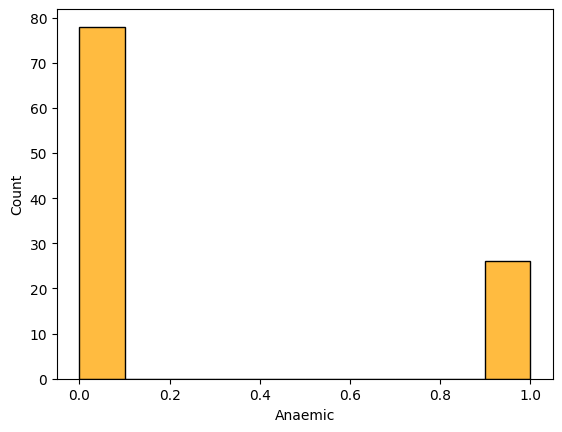

In [60]:
sns.histplot(df['Anaemic'],color='orange')

In [109]:
px.pie(df,names='Sex')

<Axes: xlabel='Sex', ylabel='Anaemic'>

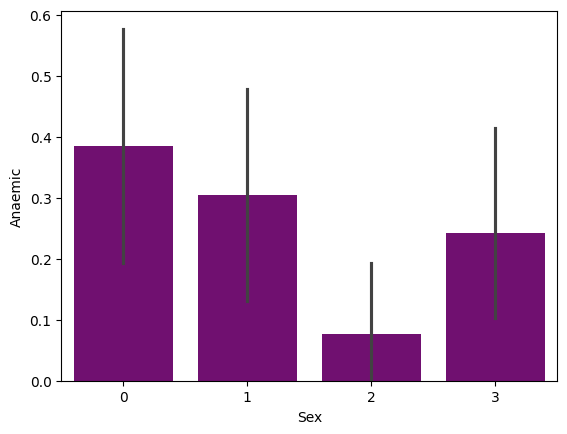

In [75]:
sns.barplot(x=df['Sex'],y=df['Anaemic'],color='purple')

<Axes: xlabel='Anaemic', ylabel='%Blue pixel'>

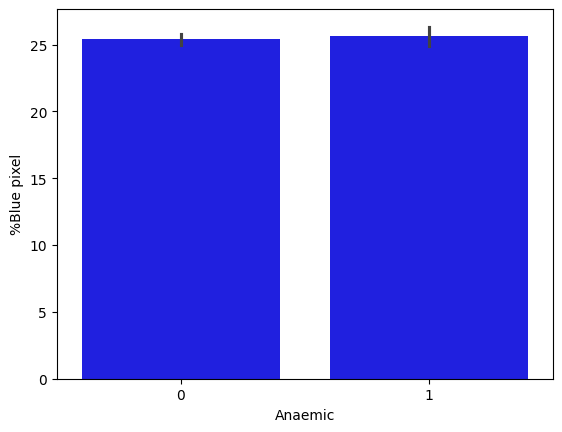

In [81]:
sns.barplot(x=df['Anaemic'],y=df['%Blue pixel'],color='blue')

<Axes: xlabel='Anaemic', ylabel='%Green pixel'>

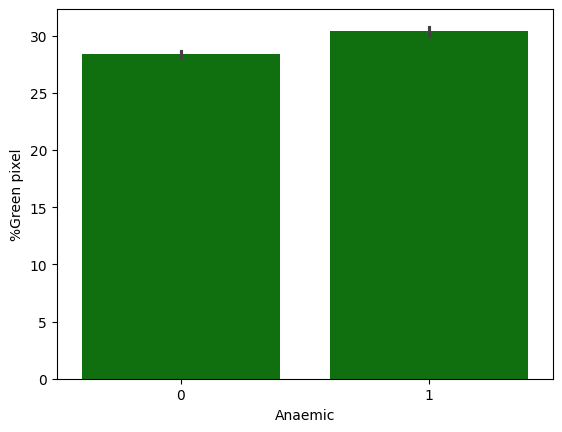

In [82]:
sns.barplot(x=df['Anaemic'],y=df['%Green pixel'],color='green')

<Axes: xlabel='Anaemic', ylabel='%Red Pixel'>

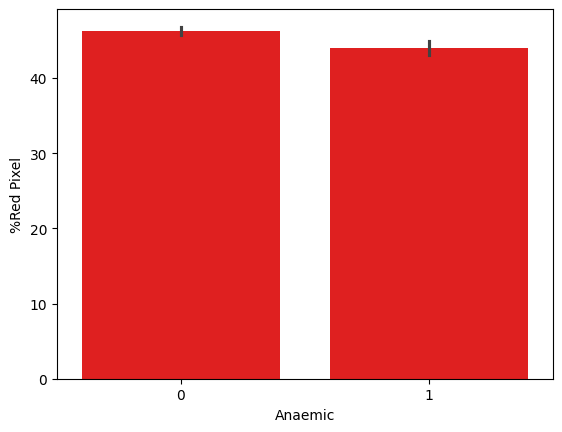

In [83]:
sns.barplot(x=df['Anaemic'],y=df['%Red Pixel'],color='red')

<Axes: xlabel='Sex', ylabel='Hb'>

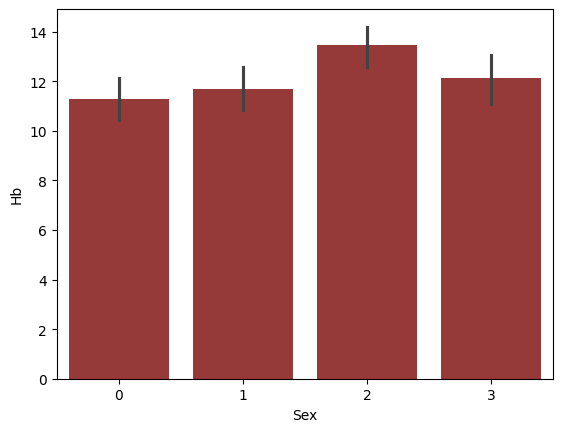

In [88]:
sns.barplot(x=df['Sex'],y=df['Hb'],color='brown')

<ipython-input-56-4f277691268e>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:yellow'` for the same effect.

  sns.barplot(x=df['Sex'],y=df['Hb'],hue=df['Anaemic'],color='yellow')


<Axes: xlabel='Sex', ylabel='Hb'>

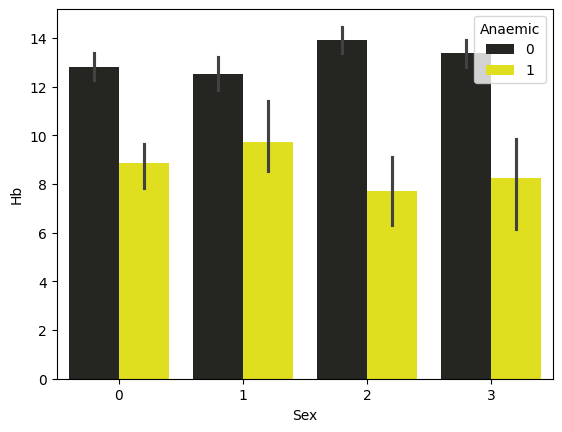

In [56]:
sns.barplot(x=df['Sex'],y=df['Hb'],hue=df['Anaemic'],color='yellow')

<Axes: xlabel='%Blue pixel', ylabel='%Green pixel'>

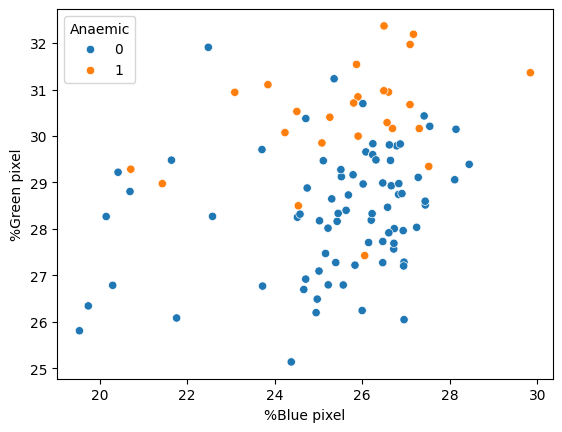

In [103]:
sns.scatterplot(x=df['%Blue pixel'],y=df['%Green pixel'],hue=df['Anaemic'])

<Axes: xlabel='%Blue pixel', ylabel='%Red Pixel'>

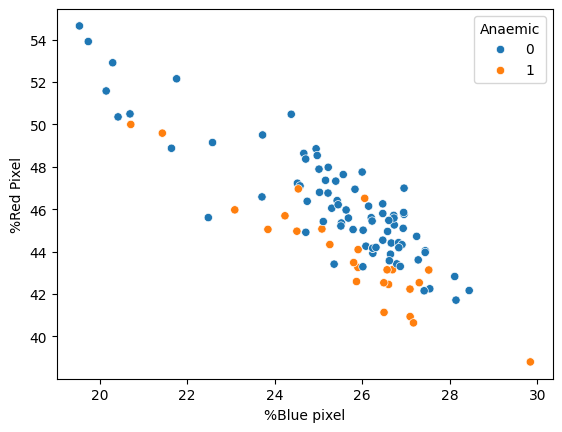

In [101]:
sns.scatterplot(x=df['%Blue pixel'],y=df['%Red Pixel'],hue=df['Anaemic'])

<Axes: xlabel='%Green pixel', ylabel='%Red Pixel'>

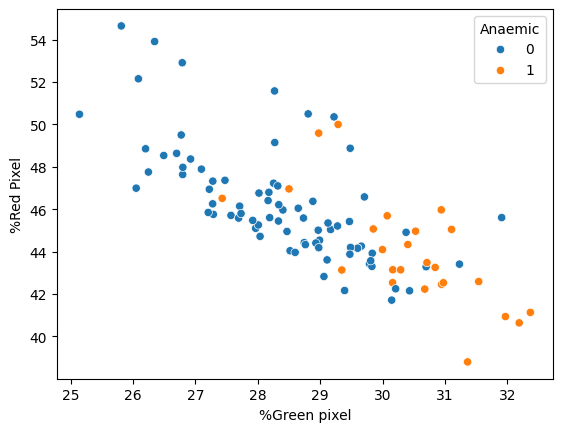

In [102]:
sns.scatterplot(x=df['%Green pixel'],y=df['%Red Pixel'],hue=df['Anaemic'])

In [90]:
df.corr()

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
Sex,1.000000,0.098272,-0.170702,-0.005766,0.184634,-0.165267
%Red Pixel,0.098272,1.000000,-0.732003,-0.845764,0.424586,-0.353376
%Green pixel,-0.170702,-0.732003,1.000000,0.255589,-0.637340,0.566447
%Blue pixel,-0.005766,-0.845764,0.255589,1.000000,-0.103373,0.057844
Hb,0.184634,0.424586,-0.637340,-0.103373,1.000000,-0.766506
Anaemic,-0.165267,-0.353376,0.566447,0.057844,-0.766506,1.000000


<Axes: >

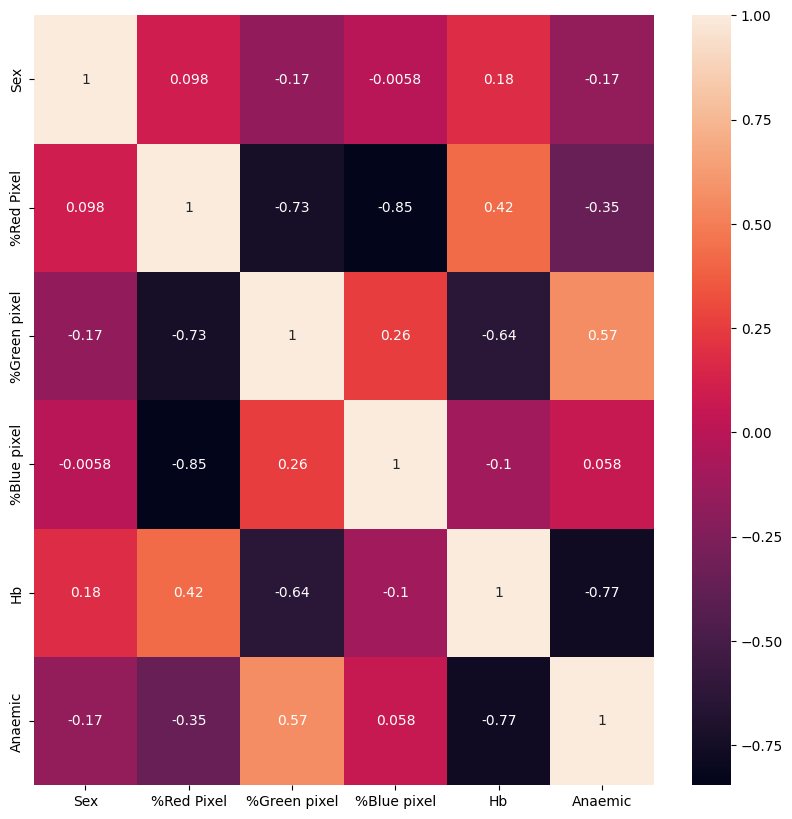

In [97]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

**CONVERTING CATEGORICAL DATA INTO NUMERICAL DATA**

In [120]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,2,43.2555,30.8421,25.9025,6.3,Yes
1,0,45.6033,28.1900,26.2067,13.5,No
2,1,45.0107,28.9677,26.0215,11.7,No
3,0,44.5398,28.9899,26.4703,13.5,No
4,3,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...
99,1,49.9999,29.2860,20.7141,14.5,Yes
100,3,42.2324,30.6757,27.0919,6.3,Yes
101,0,45.6064,31.9084,22.4852,12.7,No
102,3,45.2095,29.2769,25.5136,13.4,No


In [121]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Anaemic']=le.fit_transform(df['Anaemic'])
df

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,2,43.2555,30.8421,25.9025,6.3,1
1,0,45.6033,28.1900,26.2067,13.5,0
2,1,45.0107,28.9677,26.0215,11.7,0
3,0,44.5398,28.9899,26.4703,13.5,0
4,3,43.2870,30.6972,26.0158,12.4,0
...,...,...,...,...,...,...
99,1,49.9999,29.2860,20.7141,14.5,1
100,3,42.2324,30.6757,27.0919,6.3,1
101,0,45.6064,31.9084,22.4852,12.7,0
102,3,45.2095,29.2769,25.5136,13.4,0


**SPLITTING THE DATA**

In [122]:
x=df[['Sex','%Red Pixel','%Green pixel','%Blue pixel','Hb']]
y=df['Anaemic']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
print(x_train.shape)
print(x_test.shape)


(83, 5)
(21, 5)


**DATA SCALING**

In [123]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)
print(x_train_scaled)

[[-0.42246802 -1.66530738  2.15807941  0.78578405 -1.10767898]
 [-1.32156664 -0.89278905  0.36341527  0.99726277 -0.87920643]
 [-1.32156664  0.59482738 -0.918126   -0.17376711 -0.23948328]
 [ 0.47663059  0.81054882 -1.37992973 -0.14327205  1.8167697 ]
 [ 0.47663059  0.10315128 -0.28279519  0.05956474  0.30885085]
 [-0.42246802 -1.10450197  1.47758777  0.48758813 -1.6560131 ]
 [-0.42246802 -0.47045325  1.08763082 -0.12494522 -1.97587468]
 [ 0.47663059  1.12651831  0.45558443 -1.92186866  0.0803783 ]
 [-1.32156664 -0.43859609 -0.04871154  0.65486392  1.08565753]
 [ 0.47663059 -0.49766896  0.57683442  0.28425467  0.26315634]
 [-0.42246802  0.50203376 -0.3389041  -0.4631721   0.03468379]
 [-0.42246802  1.52160324  0.3224284  -2.38326774  0.99426851]
 [-0.42246802 -1.23762689  1.10658468  0.94491458  0.62871242]
 [-0.42246802  0.24682493  0.04598936 -0.38201752 -0.74212289]
 [ 1.3757292  -0.88962443  1.00873621  0.52444046 -1.29045702]
 [-1.32156664 -0.22160881  0.24031779  0.13863335  0.30

**CREATING MODELS**

**MODEL 1. LOGISTIC REGRESSION**

In [124]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_scaled,y_train)

LogisticRegression()

In [125]:
pred1=lr.predict(x_test_scaled)
pred1

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [126]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred1))


[[14  0]
 [ 0  7]]


In [127]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred1))

1.0


**MODEL 2. DECISION TREE**

In [128]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [129]:
pred2=dt.predict(x_test_scaled)
pred2

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [130]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred2))

1.0


**MODEL 3. RANDOM FOREST**

In [131]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [132]:
pred3=rf.predict(x_test_scaled)
pred3

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [133]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred3)

1.0

**MODEL 4. KNN**

In [134]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [135]:
pred4=knn.predict(x_test_scaled)
pred4

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0])

In [136]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred4)

0.9047619047619048

**MODEL 5. SVC**

In [137]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train_scaled,y_train)

SVC()

In [138]:
pred5=svc.predict(x_test_scaled)
pred5

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [139]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred5)

0.9047619047619048

**MODEL 6. XGBOOST**

In [140]:
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [141]:
pred6=xgb.predict(x_test_scaled)
pred6

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred6)

1.0

In [148]:
df1=pd.DataFrame({'model': ['Logis_reg','Deci_tr','Rand_for','KNN','SVC','XGBoost'],
                  'accuracy':[1,1,1,0.90,0.90,1]})
df1

,model,accuracy
0,Logis_reg,1.0
1,Deci_tr,1.0
2,Rand_for,1.0
3,KNN,0.9
4,SVC,0.9
5,XGBoost,1.0


<Axes: xlabel='model', ylabel='accuracy'>

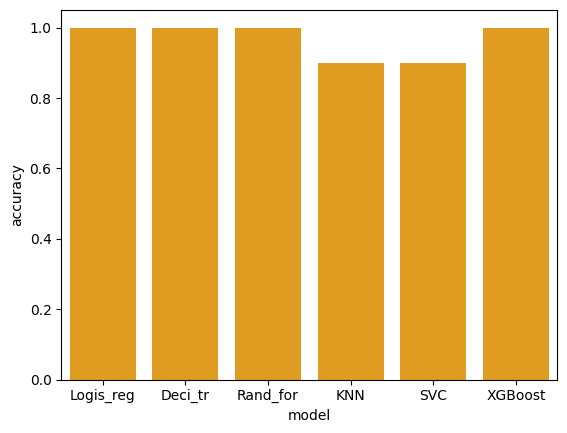

In [151]:
sns.barplot(x=df1['model'],y=df1['accuracy'],color='orange')

**CONCLUSION:**

From the above graph, we can clearly say that Logistic Regression, Decision Tree, Random Forest, XGBoost are the best models for this project.